**Lab – 1 : Basic Programs (Machine Learning)**

Target = Final_Result (Pass / Fail)

Features = Hours_Studied, Attendance, Internal_Marks

| Hours_Studied | Attendance | Internal_Marks | Final_Result |
| ------------- | ---------- | -------------- | ------------ |
| 5             | 70         | 60             | Pass         |
| 2             | 40         | 30             | Fail         |
| 8             | 90         | 85             | Pass         |
| 3             | 50         | NaN            | Fail         |
| 6             | NaN        | 70             | Pass         |


STEP-1 : Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

STEP-2 : Create & Save CSV Dataset

In [2]:
data = {
    "Hours_Studied": [5, 2, 8, 3, 6, 9, 1, 7, 4, 10],
    "Attendance": [70, 40, 90, 50, np.nan, 95, 35, 85, 60, 98],
    "Internal_Marks": [60, 30, 85, np.nan, 70, 90, 25, 80, 55, 95],
    "Final_Result": ["Pass", "Fail", "Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Fail", "Pass"]
}

df = pd.DataFrame(data)
df.to_csv("students.csv", index=False)

STEP-3 : Read CSV & Display First 5 Rows

In [3]:
df = pd.read_csv("students.csv")
print(df.head())

   Hours_Studied  Attendance  Internal_Marks Final_Result
0              5        70.0            60.0         Pass
1              2        40.0            30.0         Fail
2              8        90.0            85.0         Pass
3              3        50.0             NaN         Fail
4              6         NaN            70.0         Pass


STEP-4 : Find Missing Values

In [4]:
print(df.isnull())
print("\nTotal Missing Values:")
print(df.isnull().sum())

   Hours_Studied  Attendance  Internal_Marks  Final_Result
0          False       False           False         False
1          False       False           False         False
2          False       False           False         False
3          False       False            True         False
4          False        True           False         False
5          False       False           False         False
6          False       False           False         False
7          False       False           False         False
8          False       False           False         False
9          False       False           False         False

Total Missing Values:
Hours_Studied     0
Attendance        1
Internal_Marks    1
Final_Result      0
dtype: int64


STEP-5 : Handle Missing Values

In [5]:
df["Attendance"].fillna(df["Attendance"].mean(), inplace=True)
df["Internal_Marks"].fillna(df["Internal_Marks"].mean(), inplace=True)

/tmp/ipython-input-1042560049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Attendance"].fillna(df["Attendance"].mean(), inplace=True)
/tmp/ipython-input-1042560049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

STEP-6 : Convert Target (Pass/Fail → 1/0)

In [6]:
df["Final_Result"] = df["Final_Result"].map({"Pass":1, "Fail":0})

STEP-7 : Train-Test Split

In [7]:
X = df.drop("Final_Result", axis=1)
y = df["Final_Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP-8 : Train ML Model

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

STEP-9 : Prediction

In [9]:
y_pred = model.predict(X_test)
print("Predicted:", y_pred)
print("Actual   :", y_test.values)

Predicted: [1 0]
Actual   : [0 0]


STEP-10 : Confusion Matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1 1]
 [0 0]]


STEP-11 : Precision, Recall, F1-Score

In [11]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


STEP-12 : Visualization

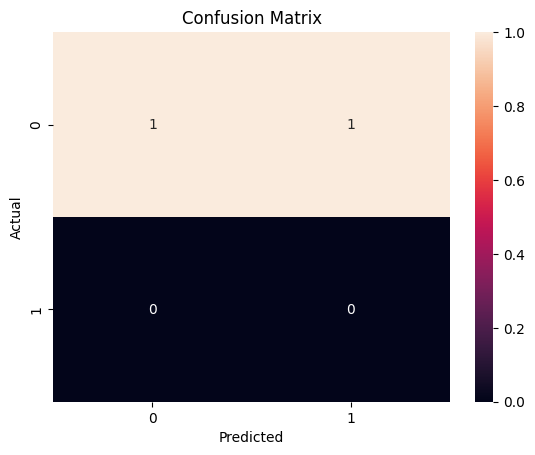

In [12]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()